# sales prediction

In [1]:
# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.DataFrame(pd.read_csv("advertising.csv"))
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.shape

(200, 4)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data cleaning

In [6]:
# Checking Null values
data.isnull().sum()
# There are no NULL values in the dataset, hence it is clean.

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

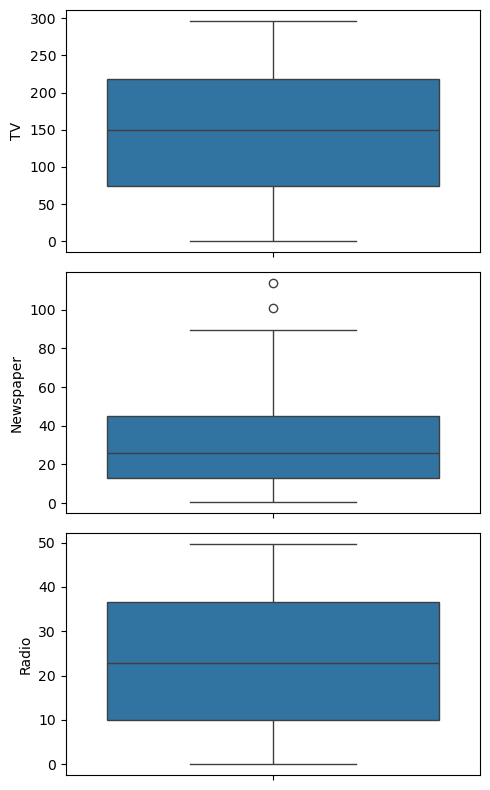

In [7]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,8))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis

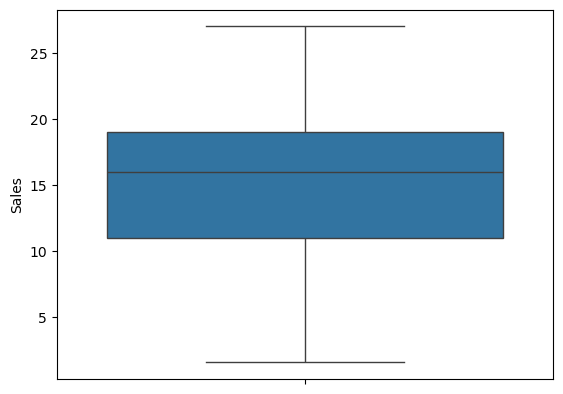

In [8]:
#Sales (Target Variable)
sns.boxplot(data['Sales'])
plt.show()

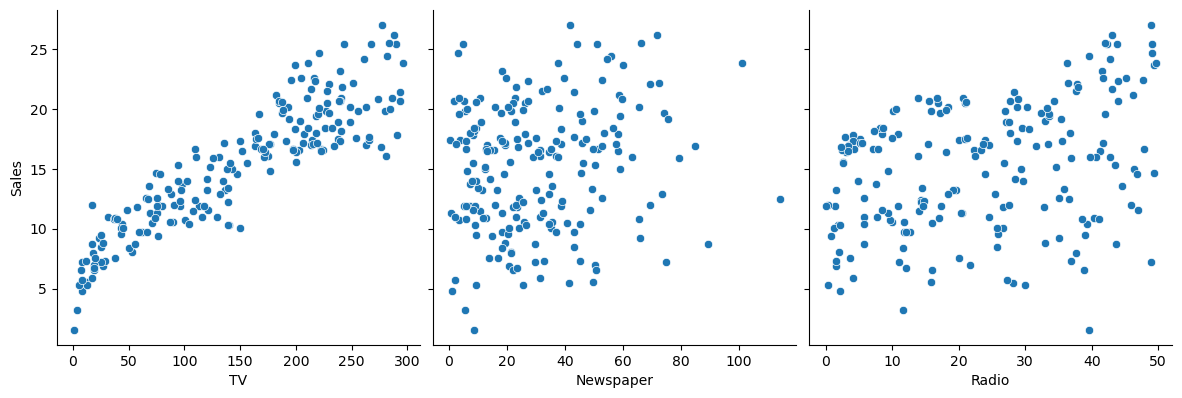

In [9]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

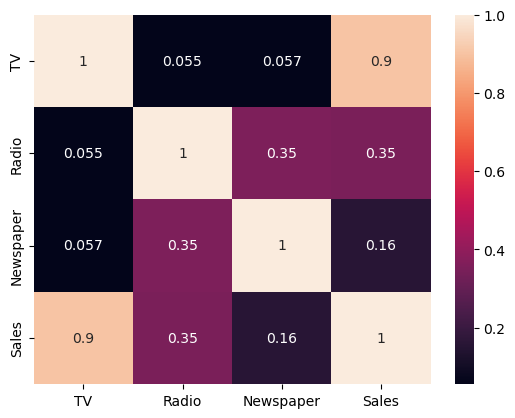

In [10]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), annot = True)
plt.show()

# Model Building

In [11]:
# Separate the features (TV, Radio, Newspaper) and the target variable (Sales)
X = data[['TV', 'Radio', 'Newspaper']]
y = data['Sales']

In [12]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [13]:
# Let's now take a look at the train dataset

X_train.head()

,TV,Radio,Newspaper
124,229.5,32.3,74.2
16,67.8,36.6,114.0
148,38.0,40.3,11.9
93,250.9,36.5,72.3
65,69.0,9.3,0.9


In [14]:
y_train.head()

124    19.7
16     12.5
148    10.9
93     22.2
65     11.3
Name: Sales, dtype: float64

In [15]:

# Create a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Make predictions on the test data
y_pred = model.predict(X_test)


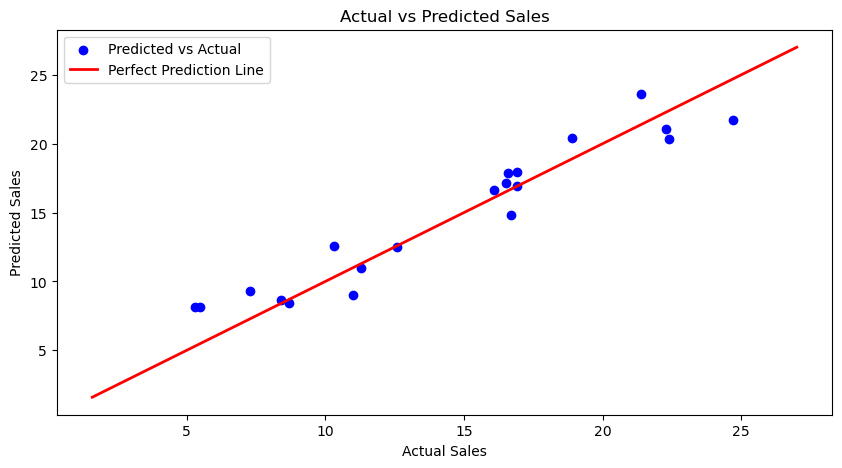

In [18]:
# Plot actual vs predicted sales
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()




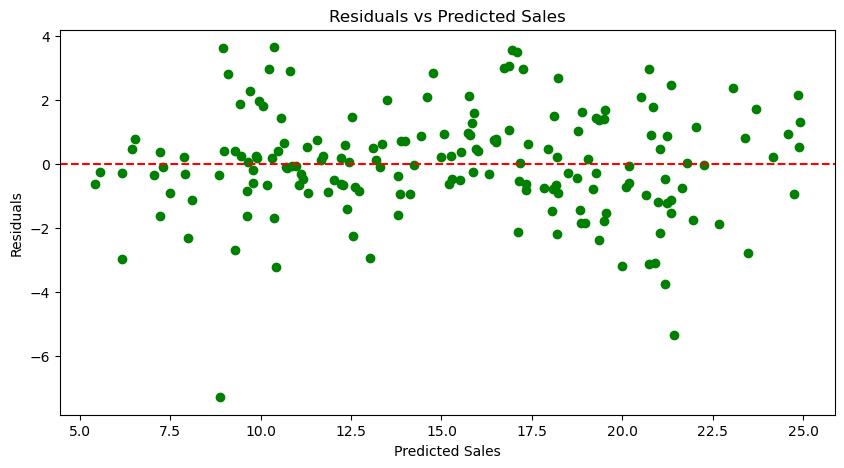

In [19]:
y_train_pred = model.predict(X_train)
res = (y_train - y_train_pred)
plt.figure(figsize=(10, 5))
plt.scatter(y_train_pred, res, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Sales')
plt.show()

<Figure size 640x480 with 0 Axes>

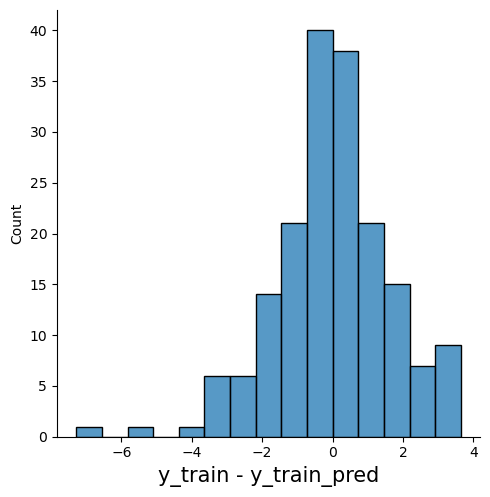

In [20]:
fig = plt.figure()
sns.displot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
r_squared = r2_score(y_test, y_pred)

# Calculate the mean squared error and take the square root
mse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print the results
print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')


R-squared: 0.9125420182627617
Mean Squared Error: 1.6906745610317755


In [24]:
# Print the predicted and actual sales values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions)


     Actual  Predicted
95     16.9  16.954759
15     22.4  20.349573
30     21.4  23.598402
158     7.3   9.285864
128    24.7  21.710158
115    12.6  12.535962
69     22.3  21.053104
170     8.4   8.684697
174    16.5  17.148014
45     16.1  16.603382
66     11.0   8.985227
182     8.7   8.439068
165    16.9  17.974859
78      5.3   8.137627
186    10.3  12.564378
177    16.7  14.832385
56      5.5   8.131894
152    16.6  17.860686
82     11.3  10.983163
68     18.9  20.437702


In [22]:
def predict_sales(tv, radio, newspaper):
    # Create a DataFrame with the user input
    input_data = pd.DataFrame({'TV': [tv], 'Radio': [radio], 'Newspaper': [newspaper]})
    
    # Make a prediction using the trained model
    prediction = model.predict(input_data)
    
    return prediction[0]

# Example usage
tv_budget = float(input("Enter TV advertising budget: "))
radio_budget = float(input("Enter Radio advertising budget: "))
newspaper_budget = float(input("Enter Newspaper advertising budget: "))

predicted_sales = predict_sales(tv_budget, radio_budget, newspaper_budget)
print(f"Predicted Sales: {predicted_sales}")

Enter TV advertising budget:  17.2
Enter Radio advertising budget:  45.9
Enter Newspaper advertising budget:  69.3


Predicted Sales: 10.568796442601684
